###Function of CountVectorizer in Scikit-Learn

*CountVectorizer is used to convert text data into a numerical representation. It tokenizes the text, builds a vocabulary of unique words, and transforms each document into a vector where each element represents the count of a word in that document.*

*How It Works:
Tokenization → Splits text into words (tokens).
Vocabulary Building → Creates a dictionary of unique words across the corpus.
Encoding → Converts each document into a vector based on word occurrences.*

In [128]:
import sklearn

In [129]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    "Machine learning is amazing",
    "Natural Language Processing makes machines understand text",
    "CountVectorizer converts text to a matrix of token counts"
]

# Initializing CountVectorizer with stop words removal
vectorizer = CountVectorizer(stop_words="english")

# Fit and transform the text data
X = vectorizer.fit_transform(corpus)

# Get the vocabulary (unique words after removing stop words)
print(vectorizer.get_feature_names_out())

# Convert sparse matrix to dense array and print
print(X.toarray())


['amazing' 'converts' 'counts' 'countvectorizer' 'language' 'learning'
 'machine' 'machines' 'makes' 'matrix' 'natural' 'processing' 'text'
 'token' 'understand']
[[1 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 1 1 0 1 1 1 0 1]
 [0 1 1 1 0 0 0 0 0 1 0 0 1 1 0]]


How CountVectorizer (Bag of Words) Works:

*Create a vocabulary → Extract all unique words from the text corpus.*

*Ignore stop words (like is, to, a, etc.) if specified.*

*Convert sentences into vectors → Each sentence is mapped to a vector where:
Each column represents a unique word.
Each row represents a sentence.*

*The value is 1 if the word appears in the sentence, otherwise 0 (or a count if appearing multiple times).*

NLTK STOPWORDS

In [130]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [131]:
sentence = "Machine learning is amazing and it is the future of AI!"


In [132]:
words=sentence.split()

In [133]:
print(words)

['Machine', 'learning', 'is', 'amazing', 'and', 'it', 'is', 'the', 'future', 'of', 'AI!']


In [134]:
filter_words=[word.lower() for word in words if word.lower() not in stopwords.words('english')]

In [135]:
cleaned_sentence = " ".join(filter_words)

In [136]:
filter_words

['machine', 'learning', 'amazing', 'future', 'ai!']

In [137]:
vectorizer=CountVectorizer()

In [138]:
vectorizer_output=vectorizer.fit_transform([cleaned_sentence])

In [139]:
print(vectorizer_output.toarray())


[[1 1 1 1 1]]


###Lets Learn about stemming and lemmatization


*Stemming: PorterStemmer*

*from nltk.stem import WordNetLemmatizer*


#More About stemming

In [140]:
from nltk.stem import PorterStemmer
porter=PorterStemmer()
porter.stem("walking")

'walk'

In [141]:
porter.stem("Walks")

'walk'

In [142]:
porter.stem("walked")

'walk'

In [143]:
porter.stem("ran")
#no rule for this particular kind of word as ran base word should be run

'ran'

In [144]:
lemmatizer.lemmatize("ran",pos=wordnet.VERB)

'run'

*The whole difference explained with a single example*

In [145]:
porter.stem("replacement")
#No real word is displayed

'replac'

In [146]:
#stemming an entire Sentence

sentence= "Lemmatization is more Sophisticated then Stemming".split()

In [147]:
for token in sentence:
  print(porter.stem(token),end=" ")
# all of these were not real words

lemmat is more sophist then stem 

In [148]:
porter.stem("berry")
#The final word was changed to berri, we should treat these 2 as one and similar

'berri'

#Lemmitization

In [149]:
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
from nltk.corpus import wordnet


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [150]:
lemmatizer=WordNetLemmatizer()
lemmatizer.lemmatize("going")

'going'

In [151]:
lemmatizer.lemmatize("going",pos=wordnet.VERB)

'go'

In [152]:
#NLTK's WordNet Lemmatizer, we use wordnet.VERB
#(or other POS tags like wordnet.NOUN, wordnet.ADJ, etc.)
#to specify the part of speech (POS). This helps get more accurate lemmas

In [153]:
porter.stem("better")

'better'

In [154]:
lemmatizer.lemmatize("better",pos=wordnet.ADJ)

'good'

#*We cannot actually tag parts of speech for each and every word so lets look at how to do this manually*

In [155]:
from nltk.corpus import wordnet  # Import WordNet from NLTK

def get_wordnet_pos(treebank_tag):
    """
    Converts Penn Treebank POS tags to WordNet POS tags.

    Parameters:
    treebank_tag (str): POS tag from Penn Treebank.

    Returns:
    wordnet.POS: Corresponding WordNet POS tag.
    """

    # If the tag starts with 'J', it represents an adjective (JJ, JJR, JJS)
    if treebank_tag.startswith('J'):
        return wordnet.ADJ  # Return WordNet's adjective tag

    # If the tag starts with 'V', it represents a verb (VB, VBD, VBG, VBN, VBP, VBZ)
    elif treebank_tag.startswith('V'):
        return wordnet.VERB  # Return WordNet's verb tag

    # If the tag starts with 'N', it represents a noun (NN, NNS, NNP, NNPS)
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN  # Return WordNet's noun tag

    # If the tag starts with 'R', it represents an adverb (RB, RBR, RBS)
    elif treebank_tag.startswith('R'):
        return wordnet.ADV  # Return WordNet's adverb tag

    # If the tag does not match any of the above categories, default to noun
    else:
        return wordnet.NOUN  # Default to noun (most common category)


#Lets Look out for CountVectorizer

In [156]:
# Import necessary libraries
import numpy as np  # NumPy for numerical operations
import pandas as pd  # Pandas for handling datasets

# Import CountVectorizer to convert text into numerical vectors
from sklearn.feature_extraction.text import CountVectorizer

# Import Multinomial Naive Bayes classifier for text classification
from sklearn.naive_bayes import MultinomialNB

# Import train_test_split to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Import Natural Language Toolkit (NLTK) for text processing
import nltk

# Import word tokenizer from NLTK for breaking text into words
from nltk import word_tokenize

# Import WordNetLemmatizer for lemmatization (reducing words to their base form)
# Import PorterStemmer for stemming (removing word suffixes to get root word)
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Import WordNet corpus from NLTK, which serves as a lexical database for lemmatization
from nltk.corpus import wordnet

# Download necessary NLTK datasets
nltk.download("wordnet")  # WordNet is required for lemmatization
nltk.download('punkt')  # Punkt tokenizer is required for tokenizing sentences
nltk.download('averaged_perceptron_tagger')  # POS tagging model for identifying word categories


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [157]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [158]:
# https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

File ‘bbc_text_cls.csv’ already there; not retrieving.



In [159]:
df=pd.read_csv('bbc_text_cls.csv')

In [160]:
df

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business
...,...,...
2220,BT program to beat dialler scams\n\nBT is intr...,tech
2221,Spam e-mails tempt net shoppers\n\nComputer us...,tech
2222,Be careful how you code\n\nA new European dire...,tech
2223,US cyber security chief resigns\n\nThe man mak...,tech


In [161]:
inputs=df['text']
labels=df['labels']

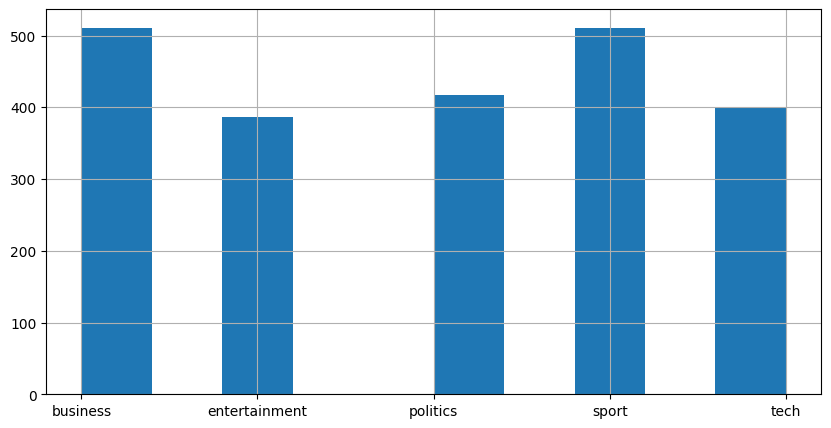

In [162]:
labels.hist(figsize=(10,5));

In [163]:
inputs_train,inputs_test,Ytrain,Ytest=train_test_split(inputs,labels,random_state=123)

In [164]:
vectorizer=CountVectorizer()
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test) #Transform for the inputs_test we shoouldnt fit on the test data

In [165]:
Xtrain

<1668x26287 sparse matrix of type '<class 'numpy.int64'>'
	with 337411 stored elements in Compressed Sparse Row format>

In [166]:
(Xtrain != 0).sum()

337411

In [167]:
(Xtrain!=0).sum() / np.prod(Xtrain.shape)

0.007695239935415004

In [168]:
model=MultinomialNB()
model.fit(Xtrain,Ytrain)
print("train score:",model.score(Xtrain,Ytrain))
print("test score:",model.score(Xtest,Ytest))


train score: 0.9922062350119905
test score: 0.9712746858168761


In [169]:
# Predicting the labels for the test set
y_pred = model.predict(Xtest)

# Comparing predictions with actual labels
accuracy = (y_pred == Ytest).mean()  # Manually calculate accuracy
print(accuracy)


0.9712746858168761


In [170]:
#with stop words
vectorizer=CountVectorizer(stop_words="english")
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))


train score: 0.9928057553956835
test score: 0.9766606822262118


In [171]:
def get_wordnet_pos(treebank_tag):
  if treebank_tag.startswith('J'):
    return wordnet.ADJ
  elif treebank_tag.startswith('V'):
    return wordnet.VERB
  elif treebank_tag.startswith('N'):
    return wordnet.NOUN
  elif treebank_tag.startswith('R'):
    return wordnet.ADV
  else:
    return wordnet.NOUN

In [172]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

class LemmaTokenizer:
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()

    def __call__(self, doc):
        return [self.lemmatizer.lemmatize(word) for word in word_tokenize(doc)]


In [173]:
import nltk
nltk.download('punkt')  # This is the correct resource needed for tokenization
nltk.download('wordnet')  # Required for lemmatization
nltk.download('omw-1.4')  # Optional but improves lemmatization


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [174]:
import nltk
print(nltk.data.path)

['/root/nltk_data', '/usr/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


In [175]:
nltk.download('punkt', download_dir='/root/nltk_data')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

*In the context of NLP (Natural Language Processing), distance and similarity are two ways of quantifying how close or how alike two text items (such as words, sentences, or documents) are to each other, but they are expressed in opposite terms.*

Distance:
Definition: Distance measures how different or far apart two items are in a vector space (such as word embeddings or feature vectors). The greater the distance, the more different the items are.
Common Measures:
Euclidean distance: Measures the straight-line distance between two points in space.
Manhattan distance: Measures the distance if you travel along the grid lines (like streets in a city).
Cosine distance: The cosine of the angle between two vectors, used when working with text embeddings or word vectors.
Interpretation: A higher value indicates that the two items are more dissimilar.
Similarity:
Definition: Similarity measures how alike two items are. It’s often the inverse of distance – the closer the items, the more similar they are.
Common Measures:
Cosine similarity: Measures the cosine of the angle between two vectors. It ranges from -1 (completely opposite) to 1 (completely similar).
Jaccard similarity: Measures the similarity between two sets by comparing their intersection to their union.
Pearson correlation: Measures the linear correlation between two vectors.
Interpretation: A higher value indicates that the two items are more similar.
In summary:

Distance gives a numerical value that quantifies how far apart two items are in the vector space.
Similarity gives a numerical value that quantifies how close or similar two items are.

The CountVectorizer in NLP creates a bag-of-words model, where it simply counts the frequency of each word in a document or a set of documents. While this method can give you basic information, it has some limitations:

Ignoring Word Order: As you mentioned, CountVectorizer doesn't consider the order of words, which can be a significant problem, especially in contexts where word order matters (e.g., in sentence meaning).
Term Frequency (TF): CountVectorizer is highly sensitive to frequently occurring words, which may not necessarily be important for the document's meaning. Common words (like "the", "and", "is") appear frequently but don’t carry much value in distinguishing documents.
TF-IDF: Solution to the Problem
TF-IDF (Term Frequency-Inverse Document Frequency) is a technique that addresses some of the issues with CountVectorizer. It focuses on assigning weights to words, emphasizing words that are important for a given document relative to the entire corpus, and downplaying common words that appear in many documents.

The Formula:
TF-IDF
(
𝑡
,
𝑑
)
=
TF
(
𝑡
,
𝑑
)
×
IDF
(
𝑡
)
TF-IDF(t,d)=TF(t,d)×IDF(t)
Where:

TF(t, d) = Term Frequency: The number of times term
𝑡
t appears in document
𝑑
d, divided by the total number of terms in document
𝑑
d.
IDF(t) = Inverse Document Frequency: A measure of how unique the term
𝑡
t is across the entire corpus of documents.
Example:
Let’s say we have the following 3 documents in a small corpus:

Document 1: "The cat sat on the mat."
Document 2: "The dog sat on the mat."
Document 3: "The cat and dog played in the park."
Now, let’s compute the TF-IDF for the term "cat" in Document 1.

Step 1: Calculate Term Frequency (TF)
The formula for TF is:

TF
(
𝑡
,
𝑑
)
=
Frequency of term
𝑡
 in document
𝑑
Total number of terms in document
𝑑
TF(t,d)=
Total number of terms in document d
Frequency of term t in document d
​

In Document 1:

The term "cat" appears once.
The total number of words in the document is 6 ("The", "cat", "sat", "on", "the", "mat").
So,

TF
(
cat
,
Document 1
)
=
1
6
≈
0.167
TF(cat,Document 1)=
6
1
​
 ≈0.167
Step 2: Calculate Inverse Document Frequency (IDF)
The formula for IDF is:

IDF
(
𝑡
)
=
log
⁡
(
𝑁
DF
(
𝑡
)
)
IDF(t)=log(
DF(t)
N
​
 )
Where:

𝑁
N is the total number of documents in the corpus (in this case, 3).
DF(t) is the number of documents containing the term
𝑡
t.
For the term "cat":

The term "cat" appears in 2 documents ("Document 1" and "Document 3").
So, DF(cat) = 2.
Now, we compute the IDF for "cat":

IDF
(
cat
)
=
log
⁡
(
3
2
)
≈
log
⁡
(
1.5
)
≈
0.176
IDF(cat)=log(
2
3
​
 )≈log(1.5)≈0.176
Step 3: Calculate TF-IDF
Now that we have both TF and IDF, we can calculate the TF-IDF for the term "cat" in Document 1:

TF-IDF
(
cat
,
Document 1
)
=
TF
(
cat
,
Document 1
)
×
IDF
(
cat
)
TF-IDF(cat,Document 1)=TF(cat,Document 1)×IDF(cat)
Substituting the values we calculated:

TF-IDF
(
cat
,
Document 1
)
=
0.167
×
0.176
≈
0.0294
TF-IDF(cat,Document 1)=0.167×0.176≈0.0294

In [176]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample documents (sentences)
documents = [
    "The cat sat on the mat.",
    "The dog sat on the mat.",
    "The cat and the dog played in the park."
]

vectorizer = TfidfVectorizer()

tfidf_matrix=vectorizer.fit_transform(documents)

import pandas as pd
tfidf_df=pd.DataFrame(tfidf_matrix.toarray(),columns=vectorizer.get_feature_names_out())
print(tfidf_df)

        and       cat       dog        in       mat        on      park  \
0  0.000000  0.394903  0.000000  0.000000  0.394903  0.394903  0.000000   
1  0.000000  0.000000  0.394903  0.000000  0.394903  0.394903  0.000000   
2  0.347184  0.264042  0.264042  0.347184  0.000000  0.000000  0.347184   

     played       sat       the  
0  0.000000  0.394903  0.613356  
1  0.000000  0.394903  0.613356  
2  0.347184  0.000000  0.615157  


In [177]:
tfidf_matrix

<3x10 sparse matrix of type '<class 'numpy.float64'>'
	with 17 stored elements in Compressed Sparse Row format>